In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import cycle
plt.style.use('ggplot')

In [161]:
data = pd.read_csv('data/Financial Distress.csv')

In [162]:
data.shape

(3672, 86)

In [163]:
data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [165]:
data['Company'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [166]:
data['Time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

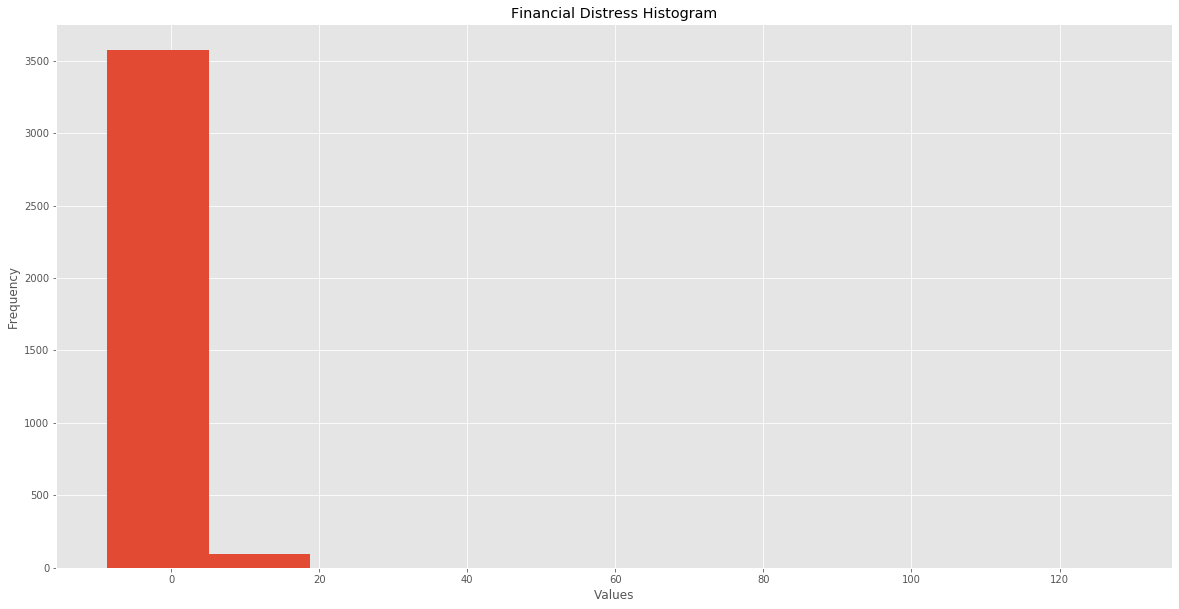

In [167]:
plt.figure(figsize=(20,10))
plt.hist(data['Financial Distress'])
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [168]:
data['Financial Distress'].describe()

count    3672.000000
mean        1.040257
std         2.652227
min        -8.631700
25%         0.172275
50%         0.583805
75%         1.351750
max       128.400000
Name: Financial Distress, dtype: float64

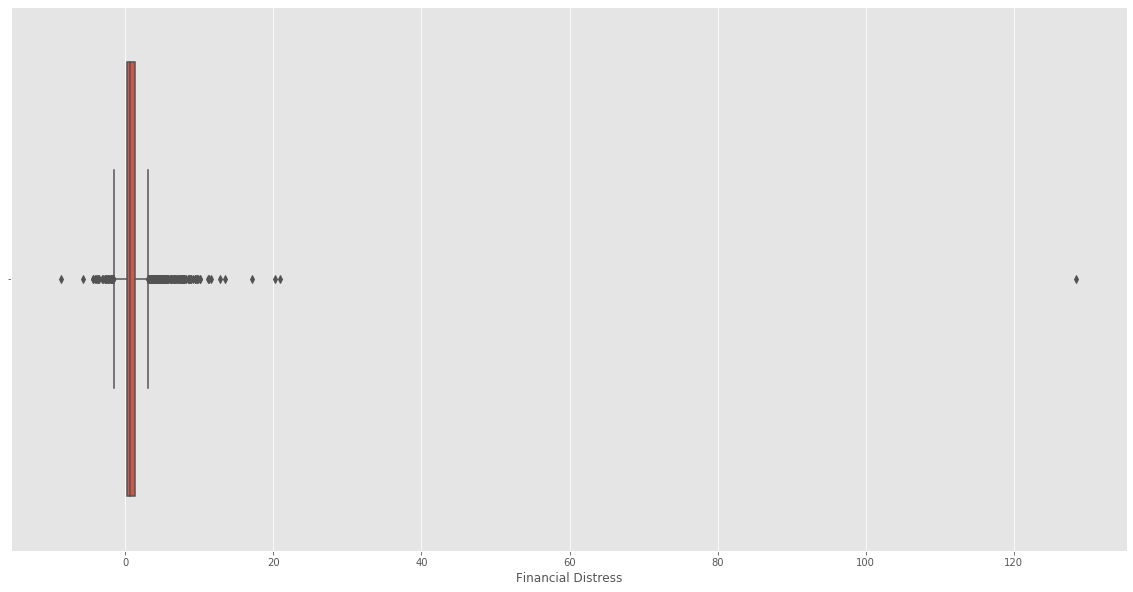

In [169]:
plt.figure(figsize=(20,10))
sns.boxplot(x=data['Financial Distress'])

In [170]:
max(data['Financial Distress'])

128.4

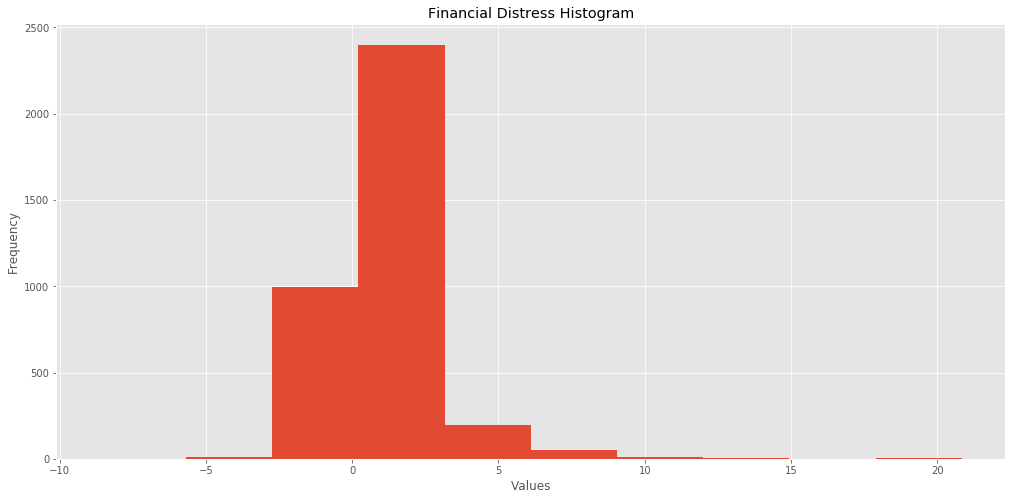

In [171]:
plt.figure(figsize=(17,8))
plt.hist(data[data['Financial Distress'] < 100]['Financial Distress'])
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [172]:
pd.qcut(data['Financial Distress'], 3).value_counts()

(1.021, 128.4]     1224
(0.295, 1.021]     1224
(-8.633, 0.295]    1224
Name: Financial Distress, dtype: int64

In [173]:
data['status'] = np.where(data['Financial Distress'] < 0.295,0,np.where(data['Financial Distress'] < 1.021, 1,2))

In [174]:
data['status'].value_counts()

2    1225
1    1224
0    1223
Name: status, dtype: int64

In [175]:
data_one_period = data.drop_duplicates(subset=['Company'], keep='last')

In [176]:
data_one_period.shape

(422, 87)

In [177]:
data_one_period['status'].value_counts()

0    231
1    102
2     89
Name: status, dtype: int64

In [178]:
data_one_period.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,1,4,-0.56657,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,0
17,2,14,2.23200,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,2
18,3,1,-1.65990,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,0
32,4,14,1.27700,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,2
46,5,14,1.63780,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,2


In [179]:
data_final = data_one_period.drop(['Financial Distress', 'Company'], axis=1)

In [180]:
data_final.head()

,Time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.10791,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,0
17,14,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,0.358880,0.54909,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,2
18,1,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,-0.056892,-0.16793,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,0
32,14,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,0.189140,0.17053,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,2
46,14,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,0.249060,0.28215,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,2


In [181]:
#plt.figure(figsize=(20,10))
#plt.title('Correlation Matrix')
#sns.heatmap(data_final.corr(), annot=True)
#plt.show()

In [182]:
abs(data_final.corr()['status']).sort_values(ascending=True)

x28       0.002354
x35       0.016076
x39       0.020654
x82       0.021716
x20       0.039651
            ...   
x5        0.605355
x81       0.609253
x2        0.620442
x10       0.739800
status    1.000000
Name: status, Length: 85, dtype: float64

In [183]:
variables = abs(data_final.corr()['status']).sort_values(ascending=True)

In [184]:
v1 = variables[0.1 < variables.values]
v2 = variables[variables.values < 0.7]
len(v2.index)

83

In [185]:
ind = v2.index
v2.index

Index(['x28', 'x35', 'x39', 'x82', 'x20', 'x31', 'x27', 'x38', 'x8', 'x32',
       'x19', 'x59', 'x16', 'x52', 'x47', 'x83', 'x57', 'x42', 'x17', 'x22',
       'x34', 'x40', 'x43', 'x11', 'x15', 'x7', 'x58', 'x21', 'x1', 'x74',
       'x44', 'x18', 'x12', 'x65', 'x56', 'x80', 'x4', 'x41', 'x66', 'x33',
       'x45', 'x30', 'x72', 'x29', 'x73', 'x71', 'x54', 'x37', 'x24', 'x67',
       'x55', 'x69', 'x6', 'x49', 'x14', 'x70', 'x3', 'x13', 'x60', 'x26',
       'x51', 'x63', 'x61', 'x23', 'x50', 'x79', 'x46', 'x62', 'x64', 'Time',
       'x77', 'x9', 'x78', 'x48', 'x36', 'x68', 'x76', 'x75', 'x53', 'x25',
       'x5', 'x81', 'x2'],
      dtype='object')

In [214]:
y = data_final['status']
X = data_final[ind]

In [187]:
X.shape

(422, 83)

In [188]:
def calc_vif(X):
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [189]:
vif_df = calc_vif(X)
vif_df.shape

(83, 2)

In [190]:
vif_df_without_corr = vif_df[vif_df['VIF'] < 10]
vif_df_without_corr.shape

(24, 2)

In [191]:
vif_df_without_corr['variables']

0     x28
3     x82
5     x31
6     x27
14    x47
15    x83
16    x57
17    x42
19    x22
21    x40
24    x15
26    x58
31    x18
32    x12
35    x80
37    x41
40    x45
46    x54
50    x55
58    x60
66    x46
71     x9
73    x48
78    x53
Name: variables, dtype: object

In [192]:
X = X[vif_df_without_corr['variables']]

In [216]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

In [220]:
def evaluate(model, train_features, train_labels, test_features, test_labels):
    train_acc = model.score(train_features, train_labels)
    predictions = model.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    accuracy = accuracy_score(test_labels, predictions)
    class_report = classification_report(y_test, predictions)
    print('Model Performance')
    print('Training data performance {:0.2f}%'.format(train_acc))
    print('Root Mean Squired Error: {:0.2f}'.format(rmse))
    print('Test Accuracy: {:0.2f}%.'.format(accuracy))
    print(class_report)

In [221]:
clf_base = LogisticRegression(random_state=42).fit(X_train, y_train)
evaluate(clf_base,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.62%
Root Mean Squired Error: 1.03
Test Accuracy: 0.50%.
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        60
           1       0.40      0.16      0.23        37
           2       0.56      0.30      0.39        30

    accuracy                           0.50       127
   macro avg       0.49      0.42      0.41       127
weighted avg       0.49      0.50      0.45       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [222]:
rf_base = RandomForestClassifier(max_depth=4, random_state=42).fit(X_train, y_train)
evaluate(rf_base,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.91%
Root Mean Squired Error: 0.54
Test Accuracy: 0.76%.
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        60
           1       0.64      0.49      0.55        37
           2       0.74      0.77      0.75        30

    accuracy                           0.76       127
   macro avg       0.73      0.72      0.72       127
weighted avg       0.74      0.76      0.75       127



In [95]:
ab_base = AdaBoostClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
evaluate(ab_base,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.77%
Mean Absolute Error: 0.61
Test Accuracy: 0.74%.
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        60
           1       0.71      0.41      0.52        37
           2       0.69      0.73      0.71        30

    accuracy                           0.74       127
   macro avg       0.72      0.70      0.69       127
weighted avg       0.73      0.74      0.72       127



In [96]:
sv_base_rbf = SVC(kernel='rbf').fit(X_train, y_train)
evaluate(sv_base_rbf,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.58%
Mean Absolute Error: 1.11
Test Accuracy: 0.47%.
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        60
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        30

    accuracy                           0.47       127
   macro avg       0.16      0.33      0.21       127
weighted avg       0.22      0.47      0.30       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
sv_base_sig = SVC(kernel='sigmoid').fit(X_train, y_train)
evaluate(sv_base_sig,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.58%
Mean Absolute Error: 1.11
Test Accuracy: 0.47%.
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        60
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        30

    accuracy                           0.47       127
   macro avg       0.16      0.33      0.21       127
weighted avg       0.22      0.47      0.30       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#sv_base_lin = SVC(kernel='linear').fit(X_train, y_train)
#evaluate(sv_base_lin,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.69%
Mean Absolute Error: 0.90
Test Accuracy: 0.58%.
              precision    recall  f1-score   support

           0       0.61      0.87      0.72        60
           1       0.52      0.32      0.40        37
           2       0.53      0.33      0.41        30

    accuracy                           0.58       127
   macro avg       0.55      0.51      0.51       127
weighted avg       0.57      0.58      0.55       127



In [99]:
xgb_model_base = xgb.XGBClassifier(objective="multi:softprob", random_state=42).fit(X_train, y_train)
evaluate(xgb_model_base, X_train, y_train, X_test, y_test)

Model Performance
Training data performance 1.00%
Mean Absolute Error: 0.63
Test Accuracy: 0.74%.
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        60
           1       0.75      0.41      0.53        37
           2       0.73      0.73      0.73        30

    accuracy                           0.74       127
   macro avg       0.74      0.70      0.70       127
weighted avg       0.74      0.74      0.72       127



from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer from sklearn.preprocessing import PolynomialFeatures from sklearn.pipeline import Pipeline # Feature union use case pipe_classifier = Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(max_depth=4, random_state=0)) ]) # rf = RandomForestClassifier(max_depth=4, random_state=0).fit(X_train, y_train) pipe_classifier pipe_classifier.fit(X_train, y_train) y_pred = pipe_classifier.predict(X_test) 
ето ви това малко парче код, което сега писахме 